In [2]:
import numpy as np
import pandas
from sklearn.ensemble import RandomForestClassifier
import os
from sklearn.metrics import matthews_corrcoef, recall_score, roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from sklearn.pipeline import Pipeline


In [2]:
from mlxtend.plotting import plot_decision_regions

In [3]:
os.chdir(r'E:\NNSience\Dwarfs\Brown-Dwarfs-NN\data')

In [497]:
df = pandas.read_csv('data1.csv')
df.head()

,SpT,PS1gmag,e_PS1gmag,PS1rmag,PS1imag,e_PS1imag,PS1zmag,e_PS1zmag,PS1ymag,e_PS1ymag,...,e_Ksmag,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,label
0,T4.5,NaN,NaN,NaN,NaN,NaN,19.17,0.01,17.42,0.01,...,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,L3.7INT-G,NaN,NaN,NaN,20.37,0.01,18.85,0.02,17.81,0.01,...,0.04,12.97,0.02,12.54,0.02,11.67,0.24,8.93,NaN,True
2,L1pec(blue),NaN,NaN,NaN,20.21,0.03,18.57,0.01,17.57,0.01,...,0.09,14.34,0.03,13.99,0.05,12.36,NaN,8.45,NaN,True
3,L5.5,NaN,NaN,NaN,22.30,0.08,20.30,0.04,19.31,0.03,...,0.22,14.82,0.03,14.57,0.06,11.73,NaN,8.10,NaN,True
4,L9,NaN,NaN,NaN,NaN,NaN,21.05,0.08,19.87,0.06,...,NaN,15.34,0.04,14.70,0.07,12.03,NaN,8.41,NaN,True


In [498]:
X = df.loc[:, 'PS1gmag':'e_W4mag']
y = df.loc[:, 'label']

In [439]:
import scipy

0.04975052768380408

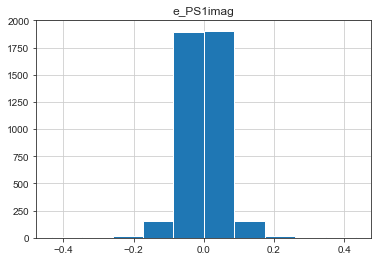

In [243]:
frames = [-X['e_PS1imag'], X['e_PS1imag']]
di = pandas.concat(frames)
di = pandas.DataFrame(di)
di.hist()
mu, sigma = scipy.stats.norm.fit(di[~di['e_PS1imag'].isna()])
sigma

In [313]:
noise1 = np.random.normal(mu, sigma, len(X))
noise2 = np.random.normal(mu, sigma, len(X))
print(noise1, noise2)

[ 0.00686257  0.01458124 -0.02843499 ...  0.06250037  0.03716988
 -0.02399773] [ 0.04925856  0.09563265  0.02488225 ...  0.06083082 -0.01074512
 -0.02951062]


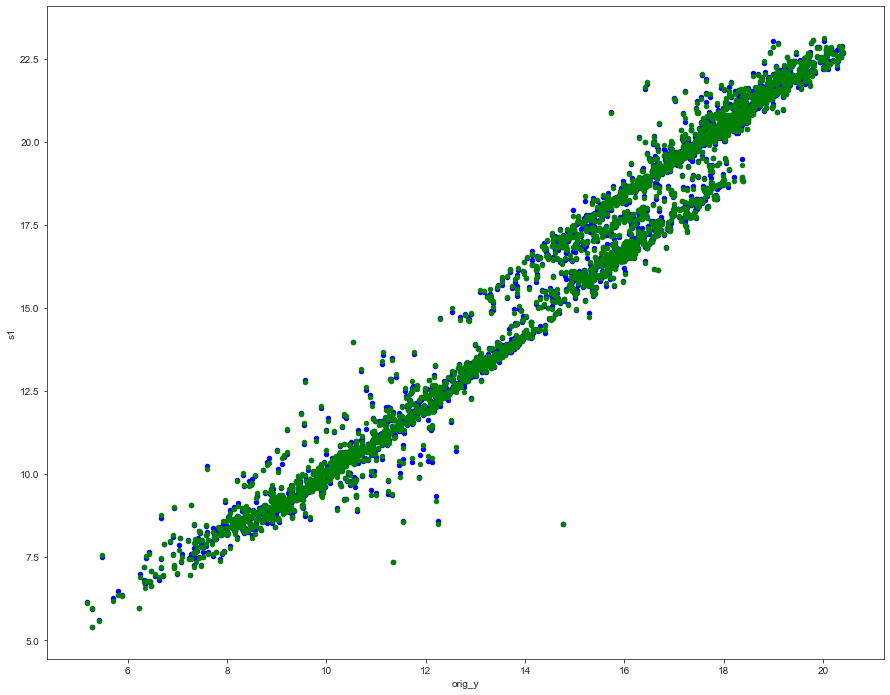

In [318]:
signal1 = X['PS1imag'] + noise1
signal2 = X['PS1imag'] + noise2
df0 = pandas.DataFrame(pandas.concat([X['PS1imag'], X['PS1ymag'], signal1, signal2], axis=1, keys=['orig_i', 'orig_y', 's1', 's2']))
df1=df0.sort_values(by=['orig_i']).index
df2=df0.sort_values(by=['s1']).index 
df3=df0.sort_values(by=['s2']).index
fp=df0.plot.scatter(x='orig_y', y='s2', c='b', figsize=(15, 12))
df0.plot.scatter(x='orig_y', y='s1', c='g', ax=fp)
#df0.plot.scatter(x='orig_y', y='s2', c='r', ax=fp)

In [499]:
errors = ['e_PS1imag','e_PS1zmag','e_PS1ymag','e_Jmag','e_Hmag','e_Ksmag', 'e_W1mag', 'e_W2mag']
magn = ['PS1imag','PS1zmag','PS1ymag','Jmag','Hmag','Ksmag', 'W1mag', 'W2mag']

In [504]:
X_0 = X[y==0]
X_1 = X[y==1 & ~X['PS1imag'].isna()]
X_11 = X[y==1 & ~X['PS1imag'].isna()]


for e,m in zip(errors,magn):
    frames = [-X_0[e], X_0[e]]
    di = pandas.concat(frames)
    di = pandas.DataFrame(di)
    mu, sigma = scipy.stats.norm.fit(di[~di[e].isna()])
    noise0 = np.random.normal(mu, sigma, len(X_0))
    X_0[m] = X_0[m] + noise0
    X_0['label'] = np.zeros(len(X_0))
    

for e,m in zip(errors,magn):
    frames = [-X_1[e], X_1[e]]
    di = pandas.concat(frames)
    di = pandas.DataFrame(di)
    mu, sigma = scipy.stats.norm.fit(di[~di[e].isna()])
    noise0 = np.random.normal(mu, sigma, len(X_1))
    noise1 = np.random.normal(mu, sigma, len(X_11))
    X_1[m] = X_1[m] + noise0
    X_11[m] = X_11[m] + noise1
    X_1 = pandas.concat([X_1, X_11])
    X_1['label'] = np.ones(len(X_1))



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
Sorting beca

In [505]:
df_new=pandas.concat([X_0, X_1])
X_new = df_new.loc[:, 'PS1gmag':'e_W4mag']
y_new = df_new.loc[:, 'label']


Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [506]:
X = pandas.concat([X, X_new])

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [507]:
y = pandas.concat([y, y_new])

In [514]:
y


0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
1594    1.0
1598    1.0
1599    1.0
1602    1.0
1603    1.0
1604    1.0
1612    1.0
1613    1.0
1614    1.0
1621    1.0
1623    1.0
1624    1.0
1625    1.0
1629    1.0
1631    1.0
1633    1.0
1634    1.0
1635    1.0
1638    1.0
1640    1.0
1643    1.0
1645    1.0
1646    1.0
1653    1.0
1654    1.0
1656    1.0
1657    1.0
1658    1.0
1659    1.0
3243    1.0
Name: label, Length: 15380, dtype: float64

In [515]:
df_ = pandas.DataFrame(X)
df_

,Hmag,Jmag,Ksmag,PS1gmag,PS1imag,PS1rmag,PS1ymag,PS1zmag,W1mag,W2mag,...,e_Jmag,e_Ksmag,e_PS1gmag,e_PS1imag,e_PS1ymag,e_PS1zmag,e_W1mag,e_W2mag,e_W3mag,e_W4mag
0,14.73,15.06,14.84,NaN,NaN,NaN,17.420000,19.170000,NaN,NaN,...,0.04,0.12,NaN,NaN,0.01,0.01,NaN,NaN,NaN,NaN
1,14.51,15.52,13.71,NaN,20.370000,NaN,17.810000,18.850000,12.970000,12.540000,...,0.06,0.04,NaN,0.01,0.01,0.02,0.02,0.02,0.24,NaN
2,15.03,15.71,14.70,NaN,20.210000,NaN,17.570000,18.570000,14.340000,13.990000,...,0.05,0.09,NaN,0.03,0.01,0.01,0.03,0.05,NaN,NaN
3,16.06,17.17,15.66,NaN,22.300000,NaN,19.310000,20.300000,14.820000,14.570000,...,0.22,0.22,NaN,0.08,0.03,0.04,0.03,0.06,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,19.870000,21.050000,15.340000,14.700000,...,NaN,NaN,NaN,NaN,0.06,0.08,0.04,0.07,NaN,NaN
5,15.84,16.59,15.09,NaN,20.750000,NaN,18.300000,19.230000,15.070000,14.900000,...,0.13,0.16,NaN,0.02,0.01,0.01,0.04,0.07,NaN,NaN
6,14.65,15.66,14.01,NaN,20.260000,22.49,17.800000,18.830000,13.470000,13.180000,...,0.07,0.05,NaN,0.01,0.01,0.01,0.03,0.03,0.41,NaN
7,15.55,16.67,15.12,NaN,NaN,NaN,18.790000,19.690000,14.240000,13.750000,...,0.13,0.13,NaN,NaN,0.13,0.02,0.03,0.04,NaN,NaN
8,15.69,17.14,14.84,NaN,NaN,NaN,19.230000,20.290000,14.110000,13.790000,...,0.21,0.08,NaN,NaN,0.06,0.04,0.03,0.04,NaN,NaN
9,15.30,15.85,15.06,NaN,20.180000,NaN,17.720000,18.710000,14.310000,14.050000,...,0.06,0.15,NaN,0.02,0.01,0.01,0.03,0.04,NaN,NaN


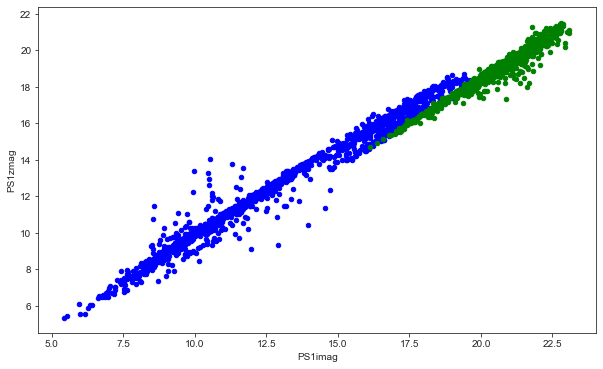

In [508]:
mag1='PS1imag'
mag2='PS1zmag'
df1 = df[df['label'] == False]
fp=df1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = df[df['label'] == True]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

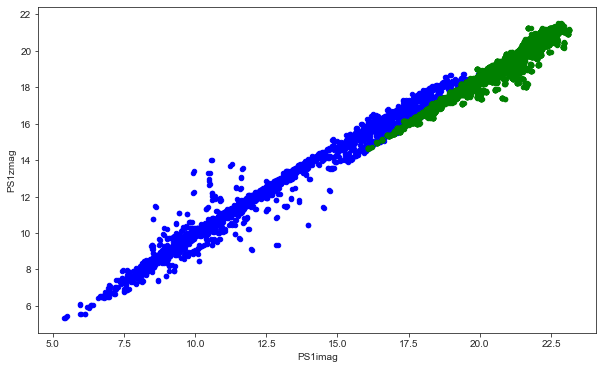

In [523]:
mag1='PS1imag'
mag2='PS1zmag'
df1 = df_[y==0]
fp=df1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = df_[y==1]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

In [527]:
df_=df_.drop(columns=errors)
df_=df_.drop(columns=['PS1gmag','e_PS1gmag', 'PS1rmag', 'e_W3mag', 'e_W4mag'])

In [528]:
df_['label']=y

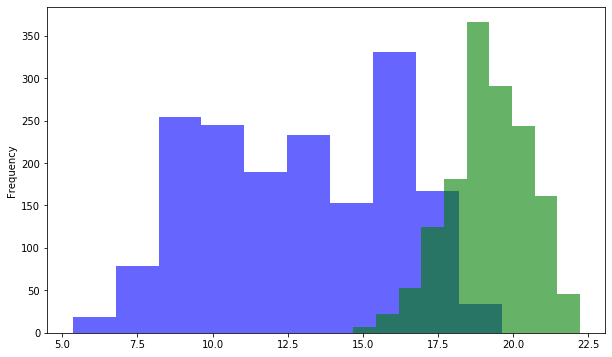

In [7]:
df1 = df[df['label'] == False].PS1zmag
fp=df1.plot.hist(alpha=0.6, color='b', figsize=(10, 6))
df2 = df[df['label'] == True].PS1zmag
df2.plot.hist(alpha=0.6, color='g')
plt.show()

In [8]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
X = imputer.fit_transform(X)
cols = df.loc[:, 'PS1gmag':'e_W4mag']
dx = pandas.DataFrame(data=X, columns=cols.columns)
dx.head()

,PS1gmag,e_PS1gmag,PS1rmag,PS1imag,e_PS1imag,PS1zmag,e_PS1zmag,PS1ymag,e_PS1ymag,Jmag,...,Ksmag,e_Ksmag,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag
0,20.973000,0.136733,22.253333,20.846667,0.063333,19.17,0.01,17.42,0.01,15.06,...,14.840000,0.120000,14.39,0.036667,12.956667,0.03,11.94,0.300000,8.623333,0.520000
1,22.443333,0.160000,22.450000,20.370000,0.010000,18.85,0.02,17.81,0.01,15.52,...,13.710000,0.040000,12.97,0.020000,12.540000,0.02,11.67,0.240000,8.930000,0.433333
2,22.067333,0.152100,22.260000,20.210000,0.030000,18.57,0.01,17.57,0.01,15.71,...,14.700000,0.090000,14.34,0.030000,13.990000,0.05,12.36,0.456667,8.450000,0.476667
3,22.661333,0.121433,22.940000,22.300000,0.080000,20.30,0.04,19.31,0.03,17.17,...,15.660000,0.220000,14.82,0.030000,14.570000,0.06,11.73,0.320000,8.100000,0.433333
4,22.661333,0.084433,22.580000,22.623333,0.140000,21.05,0.08,19.87,0.06,17.36,...,15.593333,0.113333,15.34,0.040000,14.700000,0.07,12.03,0.370000,8.410000,0.420000


(array([3.346e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.01  , 1.0085, 2.007 , 3.0055, 4.004 , 5.0025, 6.001 , 6.9995,
        7.998 , 8.9965, 9.995 ]),
 <a list of 10 Patch objects>)

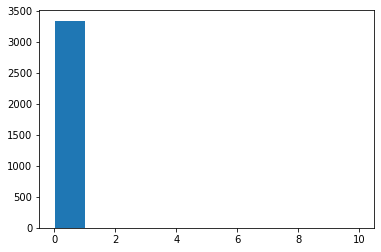

In [23]:
plt.hist(dx.e_Ksmag)

In [72]:
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=13)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=13)

Cleaned data from columns with "errors" of magnitude

In [624]:
df = pandas.read_csv('data2.csv')
#0.013-0.05*(np.mean(df.PS1gmag-df.PS1rmag))
df

,SpT,PS1gmag,PS1rmag,PS1imag,PS1zmag,PS1ymag,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag,label
0,T4.5,NaN,NaN,NaN,19.17,17.42,15.06,14.73,14.84,NaN,NaN,NaN,NaN,True
1,L3.7INT-G,NaN,NaN,20.37,18.85,17.81,15.52,14.51,13.71,12.97,12.54,11.67,8.93,True
2,L1pec(blue),NaN,NaN,20.21,18.57,17.57,15.71,15.03,14.70,14.34,13.99,12.36,8.45,True
3,L5.5,NaN,NaN,22.30,20.30,19.31,17.17,16.06,15.66,14.82,14.57,11.73,8.10,True
4,L9,NaN,NaN,NaN,21.05,19.87,NaN,NaN,NaN,15.34,14.70,12.03,8.41,True
5,L0,NaN,NaN,20.75,19.23,18.30,16.59,15.84,15.09,15.07,14.90,12.26,8.72,True
6,L2.5,NaN,22.49,20.26,18.83,17.80,15.66,14.65,14.01,13.47,13.18,12.33,8.86,True
7,L5pec,NaN,NaN,NaN,19.69,18.79,16.67,15.55,15.12,14.24,13.75,12.26,9.05,True
8,L7,NaN,NaN,NaN,20.29,19.23,17.14,15.69,14.84,14.11,13.79,12.03,8.38,True
9,L0,NaN,NaN,20.18,18.71,17.72,15.85,15.30,15.06,14.31,14.05,11.70,8.49,True


In [ ]:
df=df_
df_

In [640]:
X = df.loc[:, 'PS1imag':'W4mag']
y = df.loc[:, 'label']
cols = df.loc[:, 'PS1imag':'W4mag']


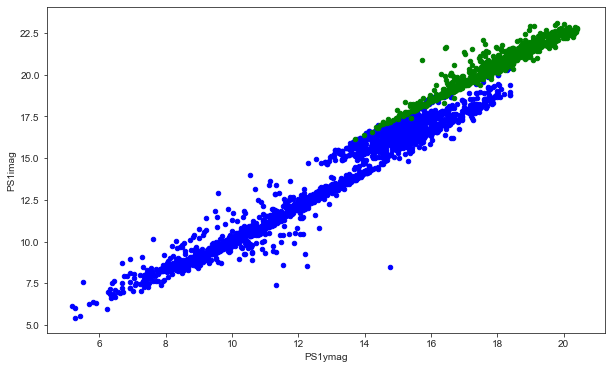

In [616]:
mag1='PS1ymag'
mag2='PS1imag'
df1 = df[df['label'] == False]
fp=df1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = df[df['label'] == True]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

Imputing missing values with KNN imputer

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000226F84277F0>]],
      dtype=object)

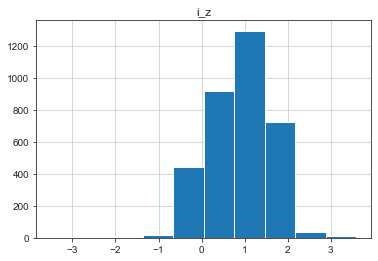

In [641]:
dx = pandas.DataFrame(data=X, columns=cols.columns)
dx['i_z'] = dx['PS1imag']-dx['PS1zmag']
dx['i_y'] = dx['PS1imag']-dx['PS1ymag']
dx['z_y'] = dx['PS1zmag']-dx['PS1ymag']
dx['z_J'] = dx['PS1zmag']-dx['Jmag']
dx['y_J'] = dx['PS1ymag']-dx['Jmag']
dx['J_H'] = dx['Jmag']-dx['Hmag']
dx['H_Ks'] = dx['Hmag']-dx['Ksmag']
dx['W1_W2'] = dx['W1mag']-dx['W2mag']
X_ = np.array(dx.loc[:, 'Jmag':'W1_W2'])

dx.hist('i_z')

In [459]:
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge

In [547]:
X_.shape

(15380, 18)

In [644]:
imputer = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=30, max_features=14, max_depth=20, min_samples_split=15), max_iter=50, random_state=123)
X = imputer.fit_transform(X_)

[IterativeImputer] Early stopping criterion not reached.


In [638]:
cols = dx.loc[:, 'Jmag':'W1_W2']
dx_ = pandas.DataFrame(data=X, columns=cols.columns)
dx.hist('i_z')
dx_.head()

ValueError: Shape of passed values is (3983, 18), indices imply (3983, 15)

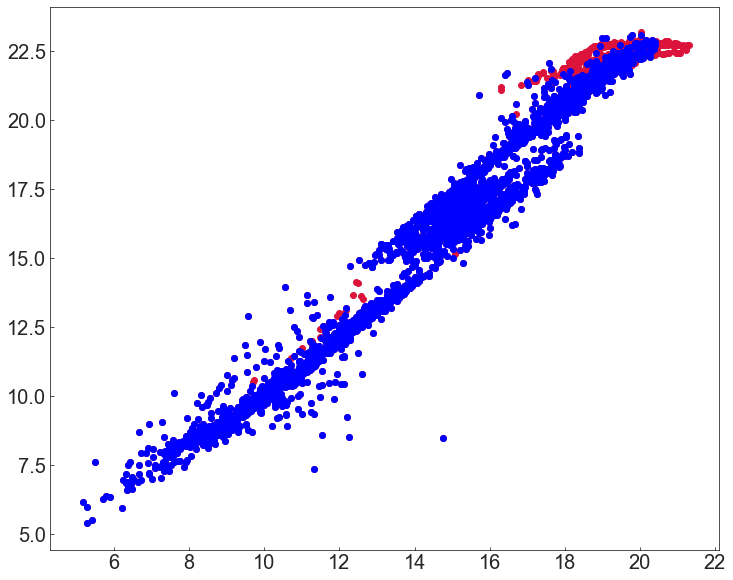

In [631]:
fig, axarr = plt.subplots(figsize=(12,10))
mag1='PS1ymag'
mag2='PS1imag'
axarr.scatter(dx_[mag1], dx_[mag2], c='crimson')
axarr.scatter(df[mag1], df[mag2], c='blue')


#axarr.set_xlabel('J', size=24)
#axarr.set_ylabel('i-z', size=24)     

xax = axarr.xaxis 
xlabels1 = xax.get_ticklabels()
for label in xlabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(20)     
yax = axarr.yaxis 
ylabels1 = yax.get_ticklabels()
for label in ylabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(20)                        
    
axarr.tick_params(axis="y",direction="in")
axarr.tick_params(axis="x",direction="in")

Test of learning rules on L&T data sample with Carnero Rosell et al.(2019) and Burningham et al.(2013)
Lots of objects were initially misclassified due to the lack of the data needed. The results after imputing with IterImp:

In [632]:
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=123)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=123)

In [568]:
cols = dx_.loc[:, 'Hmag':'W1_W2']
pos = pandas.DataFrame(data=x_test, columns=cols.columns)
#pos = dx[~dx.isnull().any(axis=1)]
mask =  (pos['z_y']>0.15) & (pos['i_z']>1.2) & (pos['y_J']>1.6) & (pos['PS1zmag']<22)
#mask =  (pos['z_J']>2.53) & (pos['Jmag']<18.8)
#mask = (pos['y_J']>0.8) & (pos['Jmag']<17.5)
corr_dr = matthews_corrcoef(mask, y_test)
print(corr_dr)

0.7929673620703344


Text(69.0, 0.5, 'Actual Class ')

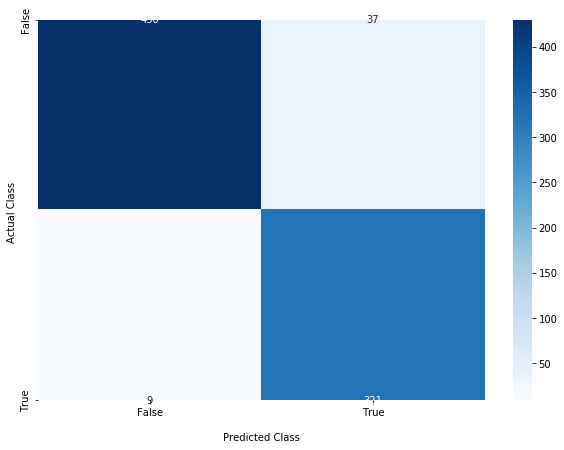

In [16]:
cf_matrix = confusion_matrix(y_test, mask)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt='d')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_xlabel('\nPredicted Class')
ax.set_ylabel('Actual Class ')

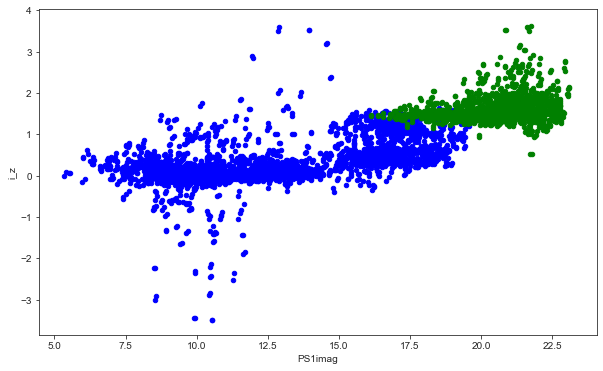

In [395]:
mag1='PS1imag'
mag2='i_z'
dx1 = dx[y == False]
fp=dx1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = dx[y == True]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

Imputer exploration


In [605]:
df = df_

X = df.loc[:, 'Hmag':'W4mag']
y = df.loc[:, 'label']
cols = df.loc[:, 'Hmag':'W4mag']

dx = pandas.DataFrame(data=X, columns=cols.columns)
dx['i_z'] = dx['PS1imag']-dx['PS1zmag']
dx['i_y'] = dx['PS1imag']-dx['PS1ymag']
dx['z_y'] = dx['PS1zmag']-dx['PS1ymag']
dx['z_J'] = dx['PS1zmag']-dx['Jmag']
dx['y_J'] = dx['PS1ymag']-dx['Jmag']
dx['J_Ks'] = dx['Jmag']-dx['Ksmag']
dx['J_H'] = dx['Jmag']-dx['Hmag']
dx['H_Ks'] = dx['Hmag']-dx['Ksmag']
dx['H_W1'] = dx['Hmag']-dx['W1mag']
dx['Ks_W1'] = dx['Ksmag']-dx['W1mag']
dx['W1_W2'] = dx['W1mag']-dx['W2mag']
X_ = np.array(dx.loc[:, 'Hmag':'W1_W2'])

i-band

In [606]:
arr1=dx[dx.PS1imag.isna()]
arr1['isn'] = 0
arr2=dx[~dx.PS1imag.isna()]
arr3=arr2.sample(frac=0.05, random_state=5)
arr4=arr3.copy()
arr4.PS1imag = np.nan
arr2['isn'] = 1
arr2 = arr2.drop(arr4.index)
arr4['isn'] = 2
frames = [arr1, arr2, arr4]
result = pandas.concat(frames)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [607]:
imputer = IterativeImputer(estimator=GradientBoostingRegressor(n_estimators=40, max_features=18, max_depth=10, min_samples_split=10), max_iter=30, random_state=123)
res = imputer.fit_transform(result)
cols = arr4.loc[:, 'Hmag':'isn']

[IterativeImputer] Early stopping criterion not reached.


In [608]:
dres = pandas.DataFrame(data=res, columns=cols.columns)
dres.head()

,Hmag,Jmag,Ksmag,PS1imag,PS1ymag,PS1zmag,W1mag,W2mag,W3mag,W4mag,...,z_y,z_J,y_J,J_Ks,J_H,H_Ks,H_W1,Ks_W1,W1_W2,isn
0,14.730000,15.060000,14.840000,20.190062,17.42,19.170000,14.653053,13.27388,12.019994,8.893238,...,1.750000,4.110000,2.360000,0.220000,0.330000,-0.110000,0.124946,0.280206,1.337315,0.0
1,16.138602,17.459969,15.758794,22.113575,19.87,21.050000,15.340000,14.70000,12.030000,8.410000,...,1.180000,3.425826,2.229628,1.278187,0.918238,0.316912,0.785107,0.490538,0.640000,0.0
2,15.550000,16.670000,15.120000,20.933733,18.79,19.690000,14.240000,13.75000,12.260000,9.050000,...,0.900000,3.020000,2.120000,1.550000,1.120000,0.430000,1.310000,0.880000,0.490000,0.0
3,15.690000,17.140000,14.840000,21.562590,19.23,20.290000,14.110000,13.79000,12.030000,8.380000,...,1.060000,3.150000,2.090000,2.300000,1.450000,0.850000,1.580000,0.730000,0.320000,0.0
4,17.770000,17.030000,17.000000,21.838009,19.56,20.999471,16.880000,14.80000,12.090000,8.340000,...,1.471772,3.988497,2.530000,0.030000,-0.740000,0.770000,0.890000,0.120000,2.080000,0.0


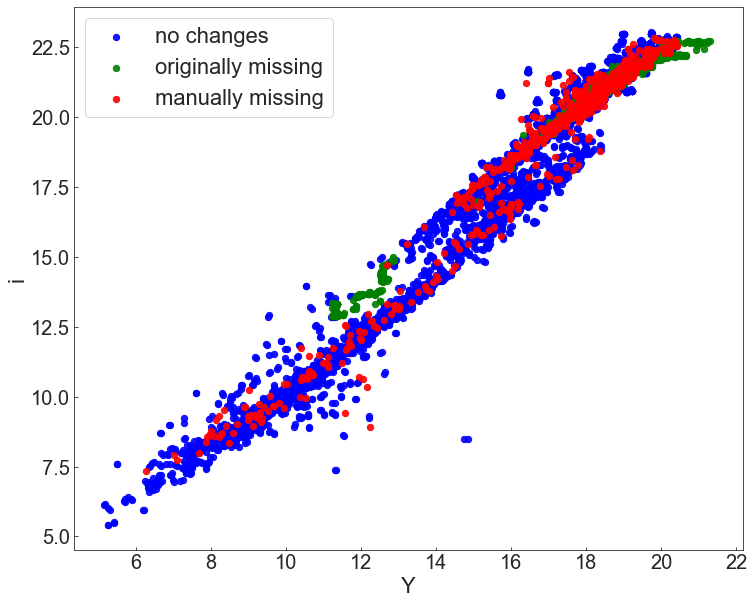

In [609]:
dx1 = dres[dres.isn == 1]
fp=dx1.plot.scatter(x='PS1ymag', y='PS1imag', c='b',figsize=(12, 10), label='no changes', s=40, alpha=0.9)
dx2 = dres[dres.isn == 0]
dx2.plot.scatter(x='PS1ymag', y='PS1imag', c='g', ax=fp, label='originally missing', s=40, alpha=0.9)
dx3 = dres[dres.isn == 2]
dx3.plot.scatter(x='PS1ymag', y='PS1imag', c='r', ax=fp, label='manually missing', s=40, alpha=0.9)

fp.set_xlabel('Y', size=22)
fp.set_ylabel('i', size=22)

xax = fp.xaxis 
xlabels1 = xax.get_ticklabels()
for label in xlabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(20)     
yax = fp.yaxis 
ylabels1 = yax.get_ticklabels()
for label in ylabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(20)                        
    
fp.tick_params(axis="y",direction="in")
fp.tick_params(axis="x",direction="in")

fp.legend(prop={'size': 22})

plt.show()

In [610]:
dxx=dx3.join(arr3, on='PS1ymag', lsuffix='_1', rsuffix='_2')

You are merging on int and float columns where the float values are not equal to their int representation


In [599]:
len(dx1)

9778

No handles with labels found to put in legend.


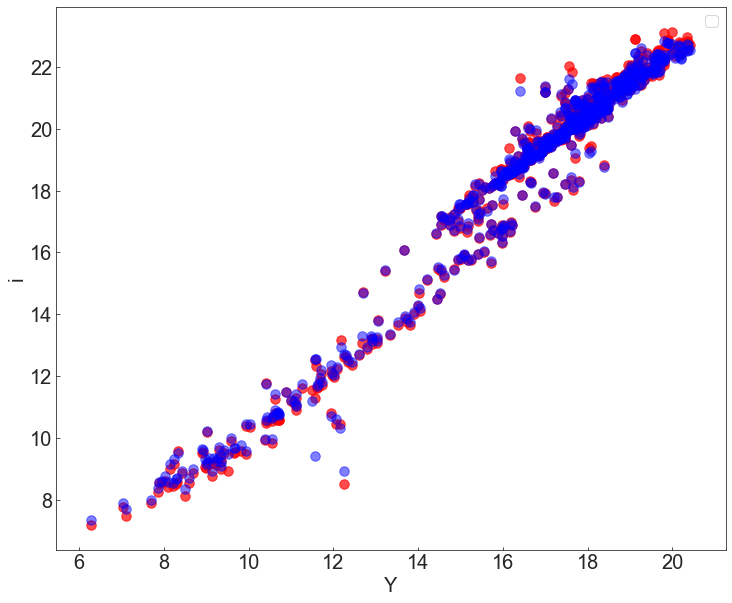

In [611]:
dx3 = dres[dres.isn == 2]
new = arr3['PS1imag']-dx3['PS1imag']
fp=arr3.plot.scatter(x='PS1ymag', y='PS1imag', c='r',alpha=0.7, figsize=(12,10), fontsize = 14, s=90)
dx3.plot.scatter(x='PS1ymag', y='PS1imag', c='b', ax=fp, alpha=0.5, s=90)

fp.set_xlabel('Y', size=20)
fp.set_ylabel('i', size=20)

xax = fp.xaxis 
xlabels1 = xax.get_ticklabels()
for label in xlabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(20)     
yax = fp.yaxis 
ylabels1 = yax.get_ticklabels()
for label in ylabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(20)                        
    
fp.tick_params(axis="y",direction="in")
fp.tick_params(axis="x",direction="in")

fp.legend(prop={'size': 16})

plt.show()

In [633]:
scaler = StandardScaler()

In [634]:
X_train2 = scaler.fit_transform(X_train)
x_val2 = scaler.transform(x_val)
x_test2 = scaler.transform(x_test)

Random Forest:

In [20]:
parameters = {'n_estimators':[10, 20, 50, 100, 200], 'max_depth':[3, 5, 10, 15, 20], 
              'min_samples_split':[2, 4, 5, 8], 'class_weight':['balanced_subsample']}
rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5)
rclf = GridSearchCV(rf, parameters, cv=skf)
rclf.fit(X_train2, y_train)
rclf.best_estimator_

KeyboardInterrupt: 

In [91]:
model_rf = rclf.best_estimator_
model_rf.fit(X_train2, y_train)
y_pred_rf = model_rf.predict(x_test2)
corr_rf = matthews_corrcoef(y_pred_rf, y_test)
print(corr_rf)

0.956333196129174


In [37]:
rf = RandomForestClassifier()
pipe_rf = Pipeline([('scaler', StandardScaler()), ('rf', rf)])

In [635]:
import optuna

In [636]:
def objective_rf(trial):
    # Invoke suggest methods of a Trial object to generate hyperparameters.
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32)
    min_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_feat =  trial.suggest_int('max_features', 1, 15)
    classif = RandomForestClassifier(n_estimators=500, max_depth=rf_max_depth, min_samples_leaf=min_leaf, max_features=max_feat, class_weight='balanced')
    classif.fit(X_train2, y_train)
    y_pred = classif.predict(x_val2)

    score = matthews_corrcoef(y_val, y_pred)

    return score  # An objective value linked with the Trial object.

study = optuna.create_study(direction='maximize')  # Create a new study.
study.optimize(objective_rf, n_trials=100)

[I 2022-06-24 22:47:16,873] Trial 0 finished with value: 0.9666460541924957 and parameters: {'rf_max_depth': 3, 'min_samples_leaf': 14, 'max_features': 7}. Best is trial 0 with value: 0.9666460541924957.
[I 2022-06-24 22:47:24,496] Trial 1 finished with value: 0.9664581690020908 and parameters: {'rf_max_depth': 11, 'min_samples_leaf': 9, 'max_features': 15}. Best is trial 0 with value: 0.9666460541924957.
[I 2022-06-24 22:47:26,855] Trial 2 finished with value: 0.969286113114299 and parameters: {'rf_max_depth': 24, 'min_samples_leaf': 30, 'max_features': 2}. Best is trial 2 with value: 0.969286113114299.
[I 2022-06-24 22:47:31,947] Trial 3 finished with value: 0.963843605575871 and parameters: {'rf_max_depth': 8, 'min_samples_leaf': 3, 'max_features': 9}. Best is trial 2 with value: 0.969286113114299.
[I 2022-06-24 22:47:36,288] Trial 4 finished with value: 0.9639142152809522 and parameters: {'rf_max_depth': 32, 'min_samples_leaf': 7, 'max_features': 8}. Best is trial 2 with value: 0.9

In [637]:
study.best_params

{'rf_max_depth': 15, 'min_samples_leaf': 10, 'max_features': 2}

In [433]:
fig = optuna.visualization.plot_parallel_coordinate(study, params=['rf_max_depth','min_samples_leaf','max_features'])

fig.show()

In [434]:
rf_model = RandomForestClassifier(n_estimators=500, max_depth=29, min_samples_leaf=4, max_features= 4)
rf_model.fit(X_train2, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=29, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [648]:
y_pred = rf_model.predict(x_test2)
matthews_corrcoef(y_test, y_pred)

ValueError: Number of features of the model must match the input. Model n_features is 15 and input n_features is 18 

Permutation explainer: 798it [1:13:54,  5.57s/it]                         


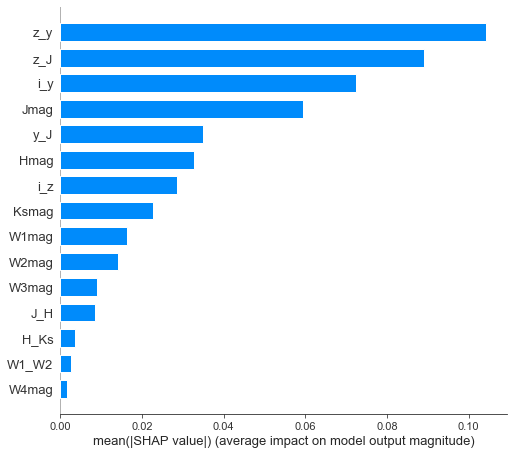

In [436]:
import shap

df_x = pandas.DataFrame(data=x_test2, columns=cols.columns)
explainer = shap.Explainer(rf_model.predict, df_x)
shap_values = explainer(df_x)
shap.summary_plot(shap_values, df_x, plot_type="bar")

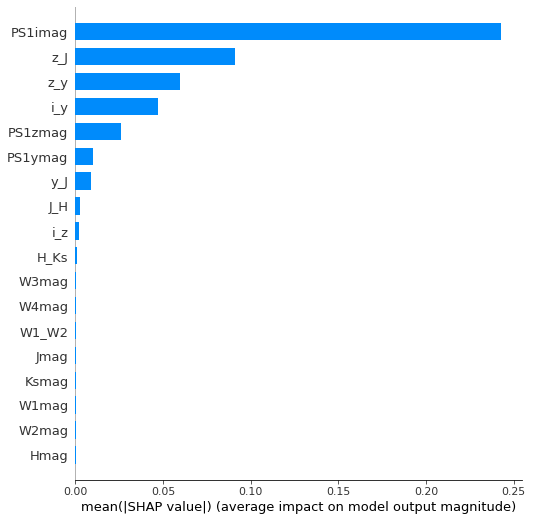

AttributeError: 'NoneType' object has no attribute 'xaxis'

In [125]:
axarr1 = shap.summary_plot(shap_values, df_x, plot_type="bar")

xax = axarr1.xaxis 
xlabels1 = xax.get_ticklabels()
for label in xlabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(24)     
yax = axarr1.yaxis 
ylabels1 = yax.get_ticklabels()
for label in ylabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(24)                        
    
axarr1.set_xlabel('Importance', size=30)     
axarr1.tick_params(axis="y",direction="in")
axarr1.tick_params(axis="x",direction="in") 
axarr1.invert_yaxis()

In [212]:
import seaborn as sns
sns.set_style("ticks")

shap.summary_plot(shap_values, df_x, plot_type="bar")

TypeError: summary_legacy() got an unexpected keyword argument 'x_label'

Selecting features with selector (for Boruta see below)

In [180]:
from mlxtend.feature_selection import SequentialFeatureSelector 

In [181]:
sffs = SequentialFeatureSelector(
           bclf,
           k_features = 17,
           forward=True, 
           floating=True, # use ADD-DEL
           verbose=0,
           scoring='balanced_accuracy',
           cv=skf)

sffs.fit(X_train2,y_train) 
df_sffs = pandas.DataFrame.from_dict(sffs.get_metric_dict()).T
df_sffs 

NameError: name 'skf' is not defined

In [37]:

model_rf = rclf.best_estimator_
model_rf.fit(X_train2, y_train)
y_pred_rf = model_rf.predict(x_val2)
corr_rf = matthews_corrcoef(y_pred_rf, y_val)
print(corr_rf)

0.9664025638666965


In [758]:
features = [1,11]

dict_v = {i:X_train2[:,i].mean()+1e-3 for i in range(len(X_train2[0])) if i not in features}
dict_vv = {i:(3) for i in range(len(X_train2[0])) if i not in features}

c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)


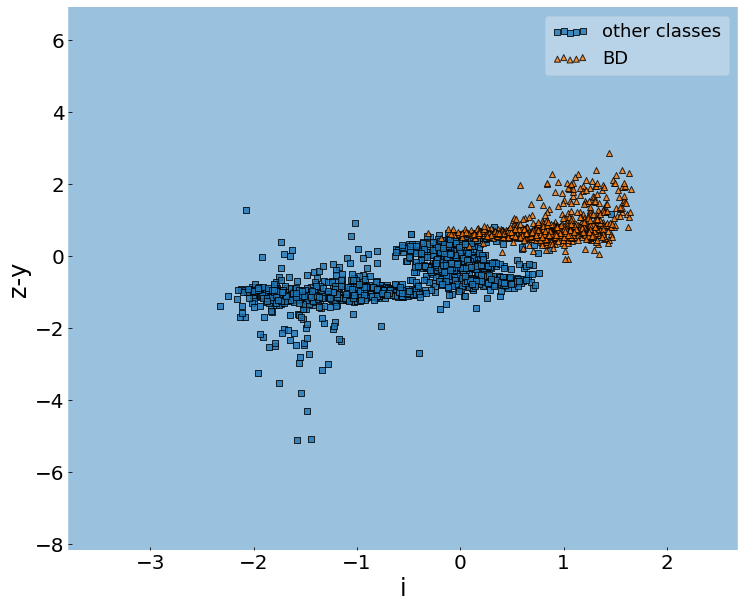

In [759]:
fig, axarr = plt.subplots(1, 1, figsize=(12,10), sharex=True, sharey=True)
plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=model_rf,
                      feature_index=features,
                      filler_feature_values=dict_v,
                      filler_feature_ranges=dict_vv, ax=axarr)

axarr.set_xlabel('i', size=24)
axarr.set_ylabel('z-y', size=24)     
handles, labels = axarr.get_legend_handles_labels()
axarr.legend(handles, 
          ['other classes', 'BD'], 
           framealpha=0.3, scatterpoints=5, prop={'size': 18}) 

xax = axarr.xaxis 
xlabels1 = xax.get_ticklabels()
for label in xlabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(20)     
yax = axarr.yaxis 
ylabels1 = yax.get_ticklabels()
for label in ylabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(20)                        
    
axarr.tick_params(axis="y",direction="in")
axarr.tick_params(axis="x",direction="in")

Text(69.0, 0.5, 'Actual Class ')

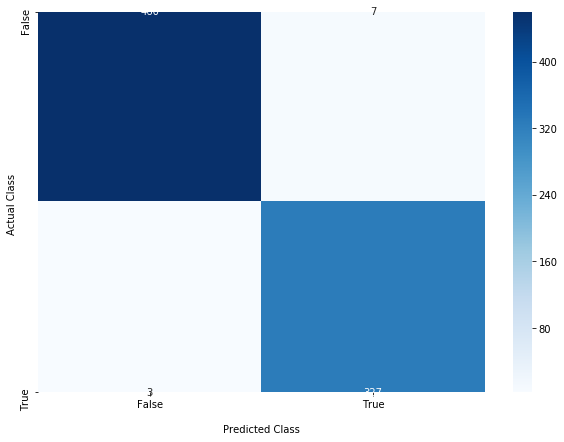

In [444]:
cf_matrix_rf = confusion_matrix(y_true = y_val, y_pred=y_pred_rf)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cf_matrix_rf, cmap='Blues', annot=True, fmt='d')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_xlabel('\nPredicted Class')
ax.set_ylabel('Actual Class ')

SVM:

In [120]:
from sklearn import svm

In [39]:
svc_clf = svm.SVC(kernel='rbf', C=0.1, class_weight='balanced', gamma='auto',decision_function_shape='ovr', random_state=123, probability=True)
svc_clf.fit(X_train2, y_train)
y_pred_svc = svc_clf.predict(x_val2)
corr_rf = matthews_corrcoef(y_pred_svc, y_val)
print(corr_rf)

0.9666460541924957


In [47]:
sffs = SequentialFeatureSelector(
           bclf,
           k_features = 17,
           forward=True, 
           floating=True, # use ADD-DEL
           verbose=0,
           scoring='balanced_accuracy',
           cv=skf)

sffs.fit(X_train2,y_train)
df_sffs = pandas.DataFrame.from_dict(sffs.get_metric_dict()).T
df_sffs 


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.951867,0.0121184,"[0.9539005144541477, 0.938426265590609, 0.9467...","(13,)","(13,)",0.00942852,0.00471426
2,0.981747,0.00952297,"[0.986973874517127, 0.9703961848862803, 0.9860...","(4, 13)","(4, 13)",0.00740919,0.0037046
3,0.981931,0.00893768,"[0.981783563098442, 0.9730557593543654, 0.9877...","(7, 13, 14)","(7, 13, 14)",0.00695382,0.00347691
4,0.982277,0.00930405,"[0.9835136669046703, 0.9730557593543654, 0.986...","(7, 8, 13, 14)","(7, 8, 13, 14)",0.00723887,0.00361943
5,0.982064,0.0106828,"[0.986973874517127, 0.9703961848862803, 0.9851...","(1, 7, 8, 13, 14)","(1, 7, 8, 13, 14)",0.0083116,0.0041558
6,0.982095,0.00803062,"[0.9825982680653961, 0.9721203228173148, 0.984...","(1, 7, 8, 13, 14, 16)","(1, 7, 8, 13, 14, 16)",0.0062481,0.00312405
7,0.982254,0.010502,"[0.9843283718716245, 0.9677366104181953, 0.987...","(0, 1, 7, 8, 13, 14, 16)","(0, 1, 7, 8, 13, 14, 16)",0.0081709,0.00408545
8,0.981191,0.00940291,"[0.9860584756778528, 0.9677366104181953, 0.983...","(0, 1, 5, 7, 8, 13, 14, 16)","(0, 1, 5, 7, 8, 13, 14, 16)",0.00731578,0.00365789


In [428]:
X2_train = X_train2[:,[1, 3, 4, 5, 10, 11, 14, 15]]
x2_val = x_val2[:,[1, 3, 4, 5, 10, 11, 14, 15]]

In [119]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50], 'gamma':('scale', 'auto'), 
              'class_weight':['balanced'], 'coef0':[0.0, 0.01, 0.1, 0.5, 1, 2]}
svc = svm.SVC()
skf = StratifiedKFold(n_splits=5)
clf = GridSearchCV(svc, parameters, cv=skf)
clf.fit(X_train2, y_train)
clf.best_estimator_

KeyboardInterrupt: 

In [121]:
bclf = clf.best_estimator_
bclf.fit(X_train2, y_train)
y_pred_bclf=bclf.predict(x_val2)
matthews_corrcoef(y_val, y_pred_bclf)

NameError: name 'clf' is not defined

In [122]:
def objective_svc(trial):
    # Invoke suggest methods of a Trial object to generate hyperparameters.
    svcc = trial.suggest_float('C', 1e-7, 1.2, log=True)
    kernel_c = trial.suggest_categorical('kernel', ['rbf', 'linear'])
    des_func = trial.suggest_categorical('decision_function_shape', ['ovo', 'ovr'])
    coef =  trial.suggest_float('coef0', 1, 5, log=True)
    gam = trial.suggest_categorical('gamma', ['auto', 'scale'])
    classif = svm.SVC(C=svcc, coef0=coef, kernel=kernel_c, class_weight='balanced', gamma=gam, decision_function_shape=des_func)
    classif.fit(X_train2, y_train)
    y_pred = classif.predict(x_val2)

    score = matthews_corrcoef(y_val, y_pred)

    return score  # An objective value linked with the Trial object.

study = optuna.create_study(direction='maximize')  # Create a new study.
study.optimize(objective_svc, n_trials=1000)

invalid value encountered in double_scalars
[I 2022-06-23 04:15:40,574] Trial 0 finished with value: 0.0 and parameters: {'C': 4.0512362743669106e-07, 'kernel': 'rbf', 'decision_function_shape': 'ovo', 'coef0': 4.046129248578045, 'gamma': 'auto'}. Best is trial 0 with value: 0.0.
[I 2022-06-23 04:15:40,649] Trial 1 finished with value: 0.9535093930534188 and parameters: {'C': 0.8208526718692252, 'kernel': 'rbf', 'decision_function_shape': 'ovo', 'coef0': 4.5244395921038505, 'gamma': 'scale'}. Best is trial 1 with value: 0.9535093930534188.
invalid value encountered in double_scalars
[I 2022-06-23 04:15:41,269] Trial 2 finished with value: 0.0 and parameters: {'C': 9.688260488620347e-07, 'kernel': 'rbf', 'decision_function_shape': 'ovr', 'coef0': 2.8455626526315707, 'gamma': 'scale'}. Best is trial 1 with value: 0.9535093930534188.
[I 2022-06-23 04:15:41,355] Trial 3 finished with value: 0.9535887607655943 and parameters: {'C': 0.2600574718207012, 'kernel': 'rbf', 'decision_function_sha

In [123]:
study.best_params

{'C': 1.1785578339058878,
 'kernel': 'rbf',
 'decision_function_shape': 'ovr',
 'coef0': 4.36590388210411,
 'gamma': 'scale'}

In [124]:
bclf = svm.SVC(kernel='rbf', C=1.1785578339058878, class_weight='balanced', gamma='scale', coef0=4.37386719156764, decision_function_shape='ovr', random_state=123, probability=True)
bclf.fit(X_train2, y_train)
y_pred_bclf=bclf.predict(x_test2)
matthews_corrcoef(y_test, y_pred_bclf)

0.956333196129174

In [45]:
import plotly

In [113]:
fig = optuna.visualization.plot_parallel_coordinate(study, params=['C','kernel', 'gamma', 'decision_function_shape','coef0'])
fig.show()

Permutation explainer: 798it [10:24,  1.26it/s]                         


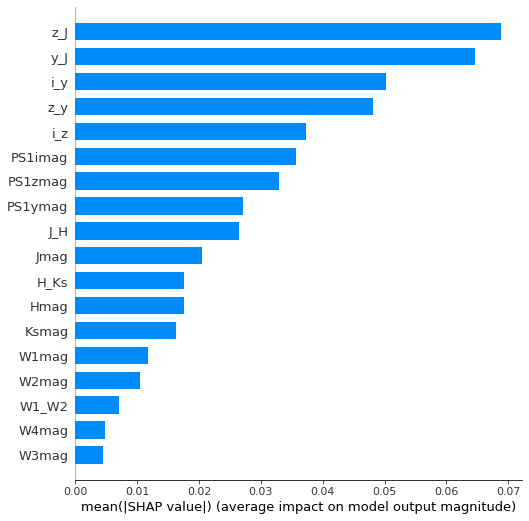

In [48]:
explainer = shap.Explainer(bclf.predict, df_x)
shap_values = explainer(df_x)
shap.summary_plot(shap_values, df_x, plot_type="bar")

In [778]:
cf_matrix_svm = confusion_matrix(y_true = y_val, y_pred=y_pred_svc)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cf_matrix_svm, cmap='Blues', annot=True, fmt='d')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_xlabel('\nPredicted Class')
ax.set_ylabel('Actual Class ')

TypeError: subplots() got an unexpected keyword argument 'figsize'

In [545]:
features = [1,12]

dict_v = {i:X_train2[:,i].mean()+0.5 for i in range(len(X_train2[0])) if i not in features}
dict_vv = {i:(X_train2.std(0)[i]+2) for i in range(len(X_train2[0])) if i not in features}

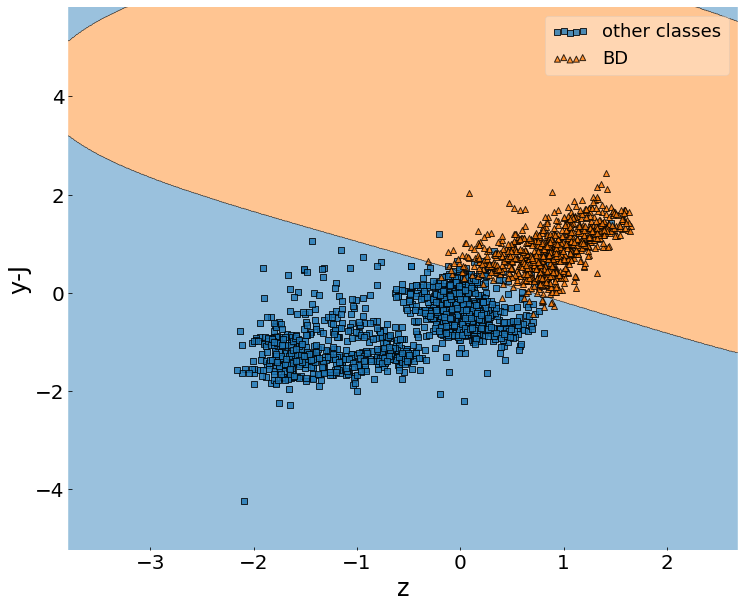

In [561]:
fig, axarr = plt.subplots(1, 1, figsize=(12,10), sharex=True, sharey=True)
plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=bclf,
                      feature_index=features,
                      filler_feature_values=dict_v,
                      filler_feature_ranges=dict_vv, ax=axarr)

axarr.set_xlabel('z', size=24)
axarr.set_ylabel('y-J', size=24)     
handles, labels = axarr.get_legend_handles_labels()
axarr.legend(handles, 
          ['other classes', 'BD'], 
           framealpha=0.3, scatterpoints=5, prop={'size': 18}) 

xax = axarr.xaxis 
xlabels1 = xax.get_ticklabels()
for label in xlabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(20)     
yax = axarr.yaxis 
ylabels1 = yax.get_ticklabels()
for label in ylabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(20)                        
    
axarr.tick_params(axis="y",direction="in")
axarr.tick_params(axis="x",direction="in")

XGBoost


In [112]:
import xgboost

In [113]:
def objective_xg(trial):
    # Invoke suggest methods of a Trial object to generate hyperparameters.
    xg_max_depth = trial.suggest_int('max_depth', 2, 24)
    lrate = trial.suggest_float('learning_rate', 0, 1)
    subsamp = trial.suggest_float('subsample', 0, 1)
    gam = trial.suggest_float('gamma', 0, 1)
    ralpha = trial.suggest_float('gamma', 0, 1)
    classif = xgboost.XGBClassifier(booster='gbtree', n_estimators=500, max_depth=xg_max_depth, learning_rate=lrate, subsample=subsamp, verbosity = 0, reg_alpha=ralpha)
    classif.fit(X_train2, y_train)
    y_pred = classif.predict(x_val2)

    score = matthews_corrcoef(y_val, y_pred)

    return score  # An objective value linked with the Trial object.

study = optuna.create_study(direction='maximize')  # Create a new study.
study.optimize(objective_xg, n_trials=150)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
[I 2022-06-23 04:04:50,758] Trial 0 finished with value: 0.971623067655624 and parameters: {'max_depth': 16, 'learning_rate': 0.29081750985906407, 'subsample': 0.8653740009895656, 'gamma': 0.1882051539258509}. Best is trial 0 with value: 0.971623067655624.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
[I 2022-06-23 04:04:51,873] Trial 1 finished with value: 0.971623067655624 and parameters: {'max_depth': 9, 'learning

In [114]:
study.best_params

{'max_depth': 24,
 'learning_rate': 0.7643065952721012,
 'subsample': 0.5361396679408698,
 'gamma': 0.6069151786267634}

In [115]:
xgb_clf = xgboost.XGBClassifier(max_depth=24, n_estimators=500, booster='gbtree', learning_rate=0.7643065952721012, gamma=0.60562070482283363, subsample=0.53759136820407905,
                            n_jobs=2, random_state=1)

In [645]:
xgb_clf.fit(X_train2, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.6056207048228336, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.7643065952721012,
              max_delta_step=0, max_depth=24, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=2,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.537591368204079,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [647]:
y_pred = xgb_clf.predict(x_test2)
matthews_corrcoef(y_pred, y_test)

0.971623067655624

Permutation explainer: 798it [02:43,  4.58it/s]                         


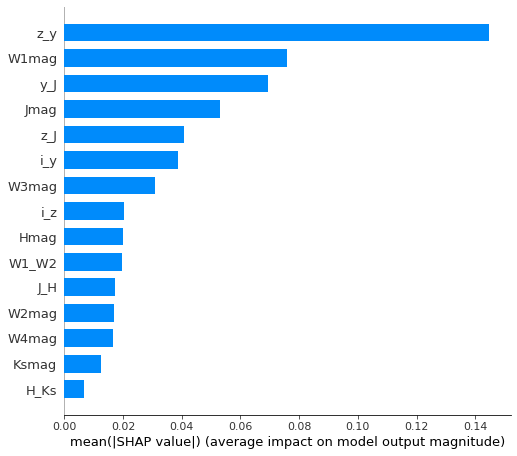

In [118]:
explainer = shap.Explainer(xgb_clf.predict, df_x)
shap_values = explainer(df_x)
shap.summary_plot(shap_values, df_x, plot_type="bar")

TabNet

In [125]:
from pytorch_tabnet.tab_model import  TabNetClassifier
import torch

In [126]:
tbn_clf1= TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

Device used : cpu


In [189]:
X2_train = X_train2[:,:]
x2_val = x_val2[:,:]


In [654]:
def Objective(trial):
    n_da = trial.suggest_int("n_da", 12, 64, step=4)
    n_steps = trial.suggest_int("n_steps", 1, 3, step=1)
    gamma = trial.suggest_float("gamma", 1., 1.4, step=0.2)
    n_shared = trial.suggest_int("n_shared", 1, 3)
    tabnet_params = dict(n_d=n_da, n_a=n_da, n_steps=n_steps, gamma=gamma, optimizer_fn=torch.optim.Adam,
                     optimizer_params=dict(lr=2e-2, weight_decay=1e-5), n_shared=n_shared,
                     scheduler_params=dict(mode="min",
                                           patience=trial.suggest_int("patienceScheduler",low=3,high=10), # changing sheduler patience to be lower than early stopping patience 
                                           min_lr=1e-5,
                                           factor=0.5,),
                     scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
                     verbose=0,
                     ) #early stopping
    classif = TabNetClassifier(**tabnet_params)
    classif.fit(X_train2, y_train)
    y_pred = classif.predict(x_val2)

    score = matthews_corrcoef(y_val, y_pred)

    return score

In [655]:
study = optuna.create_study(direction='maximize')  
study.optimize(Objective, n_trials=100)

No early stopping will be performed, last training weights will be used.


[I 2022-06-25 00:18:21,294] Trial 0 finished with value: 0.9586269547725651 and parameters: {'n_da': 16, 'n_steps': 2, 'gamma': 1.2, 'n_shared': 3, 'patienceScheduler': 9}. Best is trial 0 with value: 0.9586269547725651.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 00:23:07,723] Trial 1 finished with value: 0.963843605575871 and parameters: {'n_da': 64, 'n_steps': 2, 'gamma': 1.4, 'n_shared': 1, 'patienceScheduler': 10}. Best is trial 1 with value: 0.963843605575871.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 00:25:52,573] Trial 2 finished with value: 0.963843605575871 and parameters: {'n_da': 16, 'n_steps': 2, 'gamma': 1.4, 'n_shared': 2, 'patienceScheduler': 9}. Best is trial 1 with value: 0.963843605575871.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 00:28:21,545] Trial 3 finished with value: 0.9613787810673016 and parameters: {'n_da': 20, 'n_steps': 1, 'gamma': 1.4, 'n_shared': 3, 'patienceScheduler': 8}. Best is trial 1 with value: 0.963843605575871.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 00:37:31,114] Trial 4 finished with value: 0.9664025638666965 and parameters: {'n_da': 60, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 4 with value: 0.9664025638666965.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 00:40:57,012] Trial 5 finished with value: 0.9508508429193748 and parameters: {'n_da': 48, 'n_steps': 1, 'gamma': 1.0, 'n_shared': 1, 'patienceScheduler': 9}. Best is trial 4 with value: 0.9664025638666965.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 00:47:36,645] Trial 6 finished with value: 0.9612070757134507 and parameters: {'n_da': 40, 'n_steps': 2, 'gamma': 1.4, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 4 with value: 0.9664025638666965.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 00:50:40,937] Trial 7 finished with value: 0.9663726860641841 and parameters: {'n_da': 20, 'n_steps': 2, 'gamma': 1.2, 'n_shared': 3, 'patienceScheduler': 3}. Best is trial 4 with value: 0.9664025638666965.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 00:54:09,165] Trial 8 finished with value: 0.9431123118065553 and parameters: {'n_da': 60, 'n_steps': 2, 'gamma': 1.4, 'n_shared': 1, 'patienceScheduler': 4}. Best is trial 4 with value: 0.9664025638666965.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 00:58:48,963] Trial 9 finished with value: 0.9637985854259944 and parameters: {'n_da': 40, 'n_steps': 3, 'gamma': 1.2, 'n_shared': 2, 'patienceScheduler': 9}. Best is trial 4 with value: 0.9664025638666965.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 01:04:11,781] Trial 10 finished with value: 0.9535093930534188 and parameters: {'n_da': 56, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 2, 'patienceScheduler': 6}. Best is trial 4 with value: 0.9664025638666965.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 01:08:32,953] Trial 11 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 3}. Best is trial 11 with value: 0.9689702160794238.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 01:15:12,704] Trial 12 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 01:25:10,624] Trial 13 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 01:32:19,072] Trial 14 finished with value: 0.9560112863706371 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 2, 'patienceScheduler': 3}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 01:40:04,817] Trial 15 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 01:44:26,525] Trial 16 finished with value: 0.9560638634357946 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.2, 'n_shared': 2, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 01:50:47,600] Trial 17 finished with value: 0.963843605575871 and parameters: {'n_da': 48, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 01:54:38,821] Trial 18 finished with value: 0.9665393730087775 and parameters: {'n_da': 24, 'n_steps': 3, 'gamma': 1.2, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 01:56:53,074] Trial 19 finished with value: 0.9562181891258256 and parameters: {'n_da': 36, 'n_steps': 1, 'gamma': 1.0, 'n_shared': 2, 'patienceScheduler': 8}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 02:02:51,288] Trial 20 finished with value: 0.963843605575871 and parameters: {'n_da': 48, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 8}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 02:07:13,209] Trial 21 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 02:09:47,588] Trial 22 finished with value: 0.9586269547725651 and parameters: {'n_da': 12, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 02:14:08,122] Trial 23 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 02:19:07,862] Trial 24 finished with value: 0.9664581690020908 and parameters: {'n_da': 36, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 4}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 02:22:59,311] Trial 25 finished with value: 0.9665393730087775 and parameters: {'n_da': 24, 'n_steps': 3, 'gamma': 1.2, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 02:25:29,311] Trial 26 finished with value: 0.9613787810673016 and parameters: {'n_da': 24, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 2, 'patienceScheduler': 8}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 02:30:08,336] Trial 27 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 02:35:48,009] Trial 28 finished with value: 0.96401029001029 and parameters: {'n_da': 44, 'n_steps': 3, 'gamma': 1.2, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 02:39:27,374] Trial 29 finished with value: 0.9560112863706371 and parameters: {'n_da': 32, 'n_steps': 2, 'gamma': 1.2, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 02:42:44,035] Trial 30 finished with value: 0.9664581690020908 and parameters: {'n_da': 36, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 2, 'patienceScheduler': 10}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 02:47:24,669] Trial 31 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 02:52:04,308] Trial 32 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 02:57:23,955] Trial 33 finished with value: 0.96401029001029 and parameters: {'n_da': 40, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 03:02:02,194] Trial 34 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 03:05:34,384] Trial 35 finished with value: 0.9665393730087775 and parameters: {'n_da': 20, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 03:11:46,191] Trial 36 finished with value: 0.9664025638666965 and parameters: {'n_da': 44, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 4}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 03:15:55,457] Trial 37 finished with value: 0.963843605575871 and parameters: {'n_da': 36, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 03:18:54,061] Trial 38 finished with value: 0.9612932703485576 and parameters: {'n_da': 16, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 8}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 03:21:20,968] Trial 39 finished with value: 0.9534266830781651 and parameters: {'n_da': 32, 'n_steps': 2, 'gamma': 1.2, 'n_shared': 1, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 03:25:11,458] Trial 40 finished with value: 0.9690107118370972 and parameters: {'n_da': 24, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 03:29:54,933] Trial 41 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 03:35:13,865] Trial 42 finished with value: 0.96401029001029 and parameters: {'n_da': 40, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 03:39:55,684] Trial 43 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 03:44:59,241] Trial 44 finished with value: 0.9664581690020908 and parameters: {'n_da': 36, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 03:50:36,857] Trial 45 finished with value: 0.9664025638666965 and parameters: {'n_da': 44, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 4}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 03:54:12,453] Trial 46 finished with value: 0.9637792861628149 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 2, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 03:58:54,465] Trial 47 finished with value: 0.9665393730087775 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.4, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 04:04:13,341] Trial 48 finished with value: 0.96401029001029 and parameters: {'n_da': 40, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 8}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 04:08:05,055] Trial 49 finished with value: 0.9690107118370972 and parameters: {'n_da': 24, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 9}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 04:12:19,571] Trial 50 finished with value: 0.9613787810673016 and parameters: {'n_da': 36, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 2, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 04:16:59,456] Trial 51 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 04:21:16,184] Trial 52 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 04:27:03,047] Trial 53 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 04:32:59,955] Trial 54 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 04:38:02,014] Trial 55 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 04:43:05,182] Trial 56 finished with value: 0.9664581690020908 and parameters: {'n_da': 36, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 04:45:52,636] Trial 57 finished with value: 0.9637985854259944 and parameters: {'n_da': 40, 'n_steps': 1, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 04:50:10,012] Trial 58 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 04:54:51,662] Trial 59 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 4}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 04:59:50,154] Trial 60 finished with value: 0.9664581690020908 and parameters: {'n_da': 36, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 4}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 05:04:31,614] Trial 61 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 05:08:49,764] Trial 62 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 05:12:40,317] Trial 63 finished with value: 0.9690107118370972 and parameters: {'n_da': 24, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 05:17:20,027] Trial 64 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 4}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 05:22:17,835] Trial 65 finished with value: 0.9664581690020908 and parameters: {'n_da': 36, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 3}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 05:26:57,824] Trial 66 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 4}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 05:31:14,247] Trial 67 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 05:36:32,774] Trial 68 finished with value: 0.9665393730087775 and parameters: {'n_da': 40, 'n_steps': 3, 'gamma': 1.4, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 05:39:57,340] Trial 69 finished with value: 0.9664581690020908 and parameters: {'n_da': 20, 'n_steps': 3, 'gamma': 1.2, 'n_shared': 3, 'patienceScheduler': 8}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 05:44:17,082] Trial 70 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 05:48:55,693] Trial 71 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 05:53:37,360] Trial 72 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 05:58:41,413] Trial 73 finished with value: 0.9664581690020908 and parameters: {'n_da': 36, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 06:03:40,068] Trial 74 finished with value: 0.9664581690020908 and parameters: {'n_da': 36, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 06:08:23,815] Trial 75 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 4}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 06:12:14,536] Trial 76 finished with value: 0.9690107118370972 and parameters: {'n_da': 24, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 3}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 06:16:52,976] Trial 77 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 06:21:34,898] Trial 78 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 06:23:47,561] Trial 79 finished with value: 0.9561283716950245 and parameters: {'n_da': 28, 'n_steps': 2, 'gamma': 1.0, 'n_shared': 1, 'patienceScheduler': 4}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 06:28:45,609] Trial 80 finished with value: 0.9664581690020908 and parameters: {'n_da': 36, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 06:33:28,101] Trial 81 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 4}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 06:37:48,713] Trial 82 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 06:42:29,390] Trial 83 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 4}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 06:47:31,074] Trial 84 finished with value: 0.9664581690020908 and parameters: {'n_da': 36, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 7}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 06:52:12,582] Trial 85 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 06:56:52,574] Trial 86 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 07:00:41,512] Trial 87 finished with value: 0.9690107118370972 and parameters: {'n_da': 24, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 07:04:57,876] Trial 88 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 07:09:59,588] Trial 89 finished with value: 0.9664581690020908 and parameters: {'n_da': 36, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 07:13:48,807] Trial 90 finished with value: 0.9611987383492477 and parameters: {'n_da': 64, 'n_steps': 1, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 6}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 07:18:28,000] Trial 91 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 07:23:07,581] Trial 92 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 4}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 07:27:27,311] Trial 93 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 4}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 07:33:31,264] Trial 94 finished with value: 0.9664581690020908 and parameters: {'n_da': 36, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 3}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 07:39:53,747] Trial 95 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 07:44:44,429] Trial 96 finished with value: 0.9691687825855085 and parameters: {'n_da': 32, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 07:49:58,450] Trial 97 finished with value: 0.96401029001029 and parameters: {'n_da': 40, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 5}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 07:54:15,366] Trial 98 finished with value: 0.9689702160794238 and parameters: {'n_da': 28, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 8}. Best is trial 12 with value: 0.9691687825855085.


No early stopping will be performed, last training weights will be used.


[I 2022-06-25 07:59:15,941] Trial 99 finished with value: 0.9664581690020908 and parameters: {'n_da': 36, 'n_steps': 3, 'gamma': 1.0, 'n_shared': 3, 'patienceScheduler': 4}. Best is trial 12 with value: 0.9691687825855085.


Tuned in optuna in
 colab:
{'epochs': 92,
 'gamma': 1.2,
 'n_da': 26,
 'n_shared': 1,
 'n_steps': 2}

In [649]:
tbn_clf = TabNetClassifier(n_a=56, n_d=56, n_shared=1, n_steps=1, gamma=1, optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, 
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax')
tbn_clf.fit(X2_train, y_train,            
    eval_set=[(X2_train, y_train), (x2_val, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['balanced_accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False)


Device used : cpu
epoch 0  | loss: 0.23189 | train_balanced_accuracy: 0.9571  | valid_balanced_accuracy: 0.97083 |  0:00:07s
epoch 1  | loss: 0.08007 | train_balanced_accuracy: 0.95248 | valid_balanced_accuracy: 0.96208 |  0:00:12s
epoch 2  | loss: 0.06075 | train_balanced_accuracy: 0.96252 | valid_balanced_accuracy: 0.96636 |  0:00:18s
epoch 3  | loss: 0.06232 | train_balanced_accuracy: 0.97376 | valid_balanced_accuracy: 0.97493 |  0:00:24s
epoch 4  | loss: 0.06346 | train_balanced_accuracy: 0.96961 | valid_balanced_accuracy: 0.97172 |  0:00:31s
epoch 5  | loss: 0.06137 | train_balanced_accuracy: 0.97583 | valid_balanced_accuracy: 0.98135 |  0:00:34s
epoch 6  | loss: 0.04927 | train_balanced_accuracy: 0.97716 | valid_balanced_accuracy: 0.98135 |  0:00:37s
epoch 7  | loss: 0.07123 | train_balanced_accuracy: 0.97527 | valid_balanced_accuracy: 0.97814 |  0:00:40s
epoch 8  | loss: 0.04456 | train_balanced_accuracy: 0.98162 | valid_balanced_accuracy: 0.98564 |  0:00:44s
epoch 9  | loss: 0.

In [650]:
y_pred_tbn = tbn_clf.predict(x_test2)
corr_tbn = matthews_corrcoef(y_pred_tbn, y_test)
print(corr_tbn)

0.9719305064392649


In [192]:
tbn_clf.feature_importances_

array([2.57018570e-02, 6.08270610e-02, 4.56531915e-05, 9.68822101e-02,
       4.50180722e-02, 2.72884963e-02, 6.89053776e-02, 2.42549498e-02,
       3.58718739e-02, 5.13020056e-03, 1.40501346e-01, 4.99459831e-02,
       5.98326537e-02, 7.48131275e-02, 2.33508669e-02, 1.77455399e-03,
       2.24852109e-01, 3.50036084e-02])

In [196]:
dft= pandas.DataFrame(data=[tbn_clf.feature_importances_[0]], columns=['i'])
dft['z'] = tbn_clf.feature_importances_[1]
dft['y'] = tbn_clf.feature_importances_[2]
dft['J'] = tbn_clf.feature_importances_[3]
dft['H'] = tbn_clf.feature_importances_[4]
dft['Ks'] = tbn_clf.feature_importances_[5]
dft['W1'] = tbn_clf.feature_importances_[6]
dft['W2'] = tbn_clf.feature_importances_[7]
dft['W3'] = tbn_clf.feature_importances_[8]
dft['W4'] = tbn_clf.feature_importances_[9]
dft['i-z'] = tbn_clf.feature_importances_[10]
dft['i-y'] = tbn_clf.feature_importances_[11]
dft['z-y'] = tbn_clf.feature_importances_[12]
dft['z-J'] = tbn_clf.feature_importances_[13]
dft['y-J'] = tbn_clf.feature_importances_[14]
dft['J-H'] = tbn_clf.feature_importances_[15]
dft['H-Ks'] = tbn_clf.feature_importances_[16]
dft['W1-W2'] = tbn_clf.feature_importances_[17]
dft.columns

Index(['i', 'z', 'y', 'J', 'H', 'Ks', 'W1', 'W2', 'W3', 'W4', 'i-z', 'i-y',
       'z-y', 'z-J', 'y-J', 'J-H', 'H-Ks', 'W1-W2'],
      dtype='object')

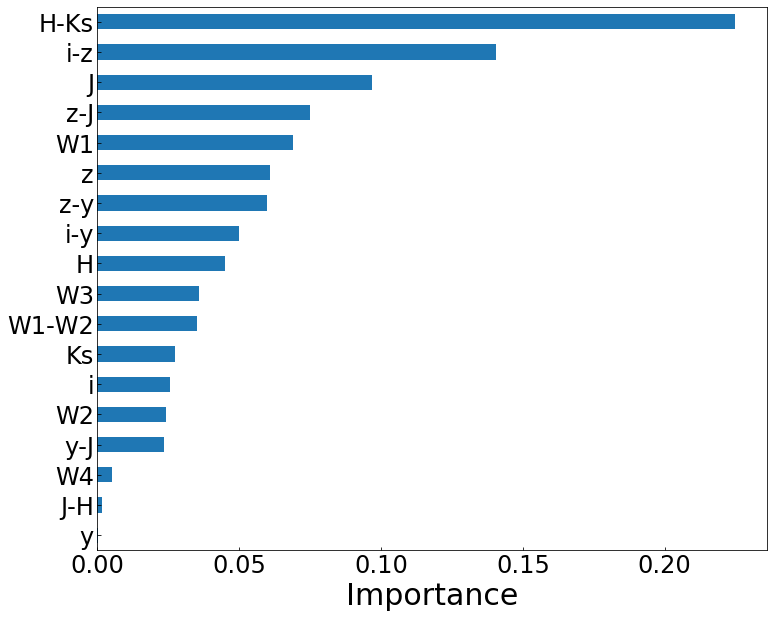

In [197]:
fig, axarr1 = plt.subplots(figsize=(12,10))
feat_importances = pandas.Series(tbn_clf.feature_importances_, index=dft.columns, name='Importance')
feat_importances.nlargest(20).plot(kind='barh')
xax = axarr1.xaxis 
xlabels1 = xax.get_ticklabels()
for label in xlabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(24)     
yax = axarr1.yaxis 
ylabels1 = yax.get_ticklabels()
for label in ylabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(24)                        
    
axarr1.set_xlabel('Importance', size=30)     
axarr1.tick_params(axis="y",direction="in")
axarr1.tick_params(axis="x",direction="in") 
axarr1.invert_yaxis()


Text(69.0, 0.5, 'Actual Class ')

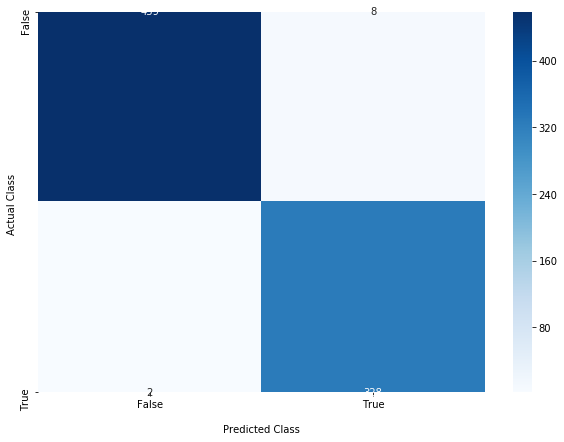

In [418]:
cf_matrix_tbn = confusion_matrix(y_val, y_pred_tbn)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cf_matrix_tbn, cmap='Blues', annot=True, fmt='d')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_xlabel('\nPredicted Class')
ax.set_ylabel('Actual Class ')

In [740]:
features = [11,12]

dict_v = {i:X_train2[:,i].mean()+0.5 for i in range(len(X_train2[0])) if i not in features}
dict_vv = {i:(4) for i in range(len(X_train2[0])) if i not in features}


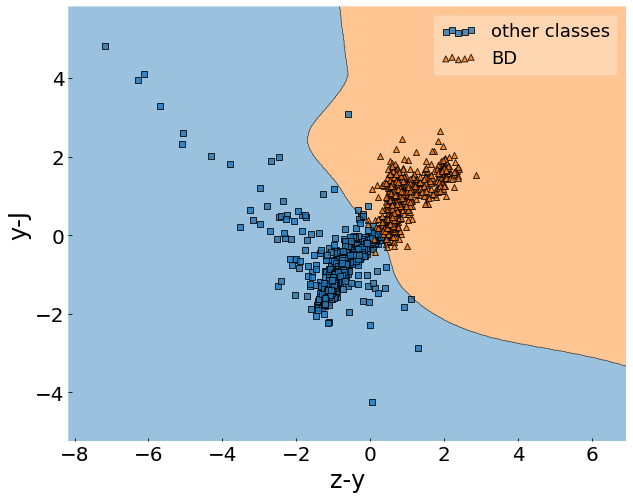

In [742]:
fig, axarr = plt.subplots(1, 1, figsize=(10,8), sharex=True, sharey=True)
plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=tbn_clf,
                      feature_index=features,
                      filler_feature_values=dict_v,
                      filler_feature_ranges=dict_vv, ax=axarr)

axarr.set_xlabel('z-y', size=24)
axarr.set_ylabel('y-J', size=24)     
handles, labels = axarr.get_legend_handles_labels()
axarr.legend(handles, 
          ['other classes', 'BD'], 
           framealpha=0.3, scatterpoints=5, prop={'size': 18}) 

xax = axarr.xaxis 
xlabels1 = xax.get_ticklabels()
for label in xlabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(20)     
yax = axarr.yaxis 
ylabels1 = yax.get_ticklabels()
for label in ylabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(20)                        
    
axarr.tick_params(axis="y",direction="in")
axarr.tick_params(axis="x",direction="in")                      

In [ ]:
from pytorch_tabnet.pretraining import TabNetPretrainer

In [ ]:
unsupervised_model = TabNetPretrainer(
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax', # "sparsemax",
    n_shared_decoder=1, # nb shared glu for decoding
    n_indep_decoder=1, # nb independent glu for decoding
)

In [ ]:
unsupervised_model.fit(
    X_train=X_train,
    eval_set=[X_valid],
    max_epochs=max_epochs , patience=5,
    batch_size=2048, virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    pretraining_ratio=0.8,
) 

Voting Classifier

In [356]:
from sklearn.ensemble import VotingClassifier

In [406]:
eclf1 = VotingClassifier(estimators=[('rf', model_rf), ('svm', svc_clf)], voting='hard')
eclf1 = eclf1.fit(X_train2, y_train)
y_pred_v1 = eclf1.predict(x_val2)

In [407]:
corr_v1 = matthews_corrcoef(y_pred_v1, y_val)
print(corr_tbn)

0.974327275160727


Text(69.0, 0.5, 'Actual Class ')

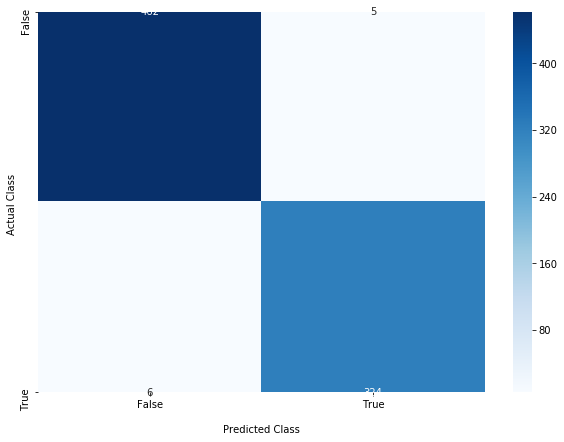

In [408]:
cf_matrix_v1 = confusion_matrix(y_val, y_pred_v1)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cf_matrix_v1, cmap='Blues', annot=True, fmt='d')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
ax.set_xlabel('\nPredicted Class')
ax.set_ylabel('Actual Class ')

Training on 2 features

In [64]:
X2_train = X_train2[:,[4, 15]]
x2_val = x_val2[:,[4, 15]]


In [195]:
parameters = {'kernel':['linear', 'rbf'], 'C':[1, 2, 5, 10, 20], 'gamma':('scale', 'auto'), 
              'class_weight':['balanced'], 'probability':[0.9]}
svc = svm.SVC()
skf = StratifiedKFold(n_splits=5)
clf = GridSearchCV(svc, parameters, cv=skf)
clf.fit(X2_train, y_train)
clf.best_estimator_

SVC(C=20, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=0.9, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [208]:
des_svc = rclf.best_estimator_
des_svc.fit(X2_train, y_train)
y_pred_dsvc2=des_svc.predict(x2_val)

Text(0.5, 1.0, 'RF')

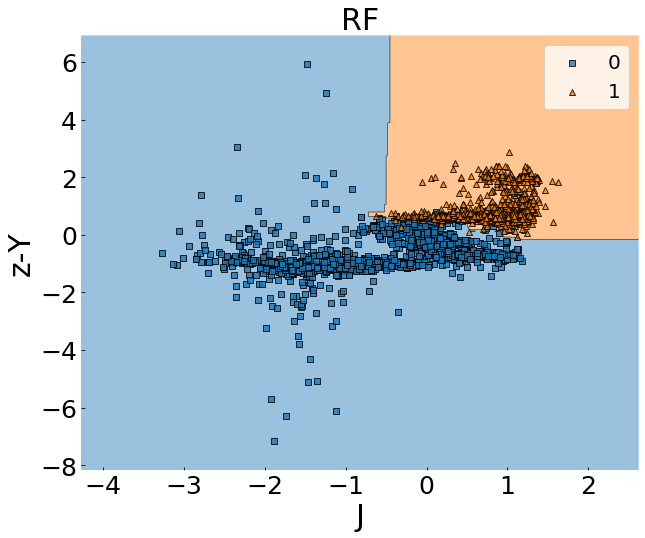

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,8), sharex=True, sharey=True)
#for i, ax in enumerate(axarr.flat):
plot_decision_regions(X2_train, np.array([int(i) for i in y_train.to_list()]), clf=des_svc)
ax.set_xlabel('J', size=30)
ax.set_ylabel('z-Y', size=30)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.legend(prop={'size': 20})
xax = ax.xaxis 
xlabels1 = xax.get_ticklabels()
for label in xlabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(25)     
yax = ax.yaxis 
ylabels1 = yax.get_ticklabels()
for label in ylabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(25)
plt.title('RF', size=30)    

In [355]:
dfy= pandas.DataFrame(data=y_val.values, columns=['y_true'])
dfy['y_pred_rf'] = y_pred_rf
dfy['y_pred_svm'] = y_pred_bclf
dfy['y_pred_tab'] = y_pred_tbn

dfy.loc[dfy['y_true']!=dfy['y_pred_svm']]

,y_true,y_pred_rf,y_pred_svm,y_pred_tab
20,True,True,False,True
99,False,True,True,False
157,False,True,True,True
171,False,True,True,True
232,False,True,True,True
293,False,False,True,False
297,False,True,True,True
324,True,False,False,False
330,False,True,True,True
335,True,False,False,False


Selecting features with Boruta

In [118]:
from boruta import BorutaPy

In [128]:
feat_selector = BorutaPy(rf_model, n_estimators='auto', verbose=2, random_state=42, perc=0.90, two_step=False)

In [129]:
feat_selector.fit(X_train2, y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	1
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	18
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	14 / 100
Confirmed: 	18
Tentative: 	0
Rejected: 	0


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=30, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=23,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=20, n_jobs=None,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x193CEC42570,
                                          verbose=0, warm_start=False),
         max_iter=100, n_estimators='a

Correlation of features

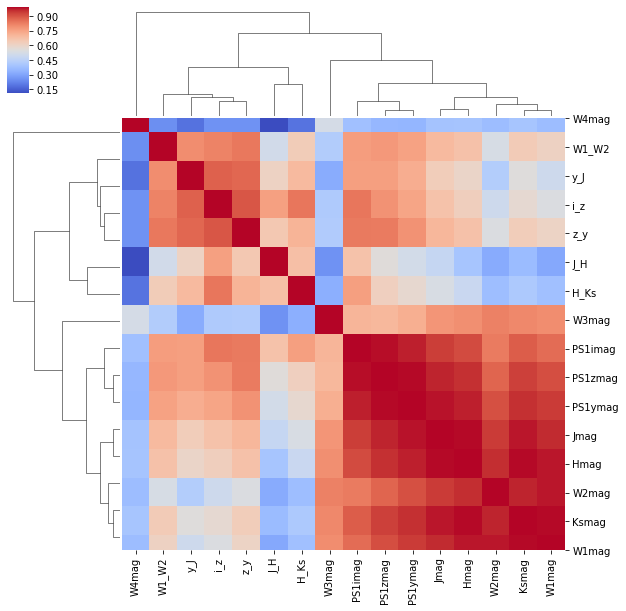

In [119]:
X_ = dx.loc[:, 'PS1imag':'W1_W2']
corr_matrix = X_.corr(method='spearman')
res = sns.clustermap(corr_matrix, method='weighted', figsize=(10, 10), cmap='coolwarm')

Selecting features with selector

In [173]:
sffs = SequentialFeatureSelector(
           rf_model,
           k_features = 17,
           forward=True, 
           floating=True, # use ADD-DEL
           verbose=0,
           scoring='balanced_accuracy',
           cv=skf)

sffs.fit(X_train2,y_train)
df_sffs = pandas.DataFrame.from_dict(sffs.get_metric_dict()).T
df_sffs 

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.952363,0.0078303,"[0.9599055308397869, 0.9443873807776962, 0.948...","(11,)","(11,)",0.00609224,0.00304612
2,0.984323,0.0056304,"[0.9843283718716245, 0.9790168745414527, 0.987...","(3, 11)","(3, 11)",0.00438064,0.00219032
3,0.984854,0.0062972,"[0.9843283718716245, 0.9790168745414527, 0.990...","(3, 7, 11)","(3, 7, 11)",0.00489943,0.00244972
4,0.985199,0.00684166,"[0.9843283718716245, 0.9790168745414527, 0.990...","(3, 6, 9, 11)","(3, 6, 9, 11)",0.00532305,0.00266152
5,0.98573,0.00630389,"[0.9887039783233554, 0.9799523110785033, 0.987...","(3, 6, 9, 11, 13)","(3, 6, 9, 11, 13)",0.00490464,0.00245232
6,0.98488,0.00540824,"[0.9852437707108987, 0.9782281731474688, 0.987...","(3, 6, 9, 10, 11, 13)","(3, 6, 9, 10, 11, 13)",0.0042078,0.0021039
7,0.985945,0.00754304,"[0.986973874517127, 0.9765040352164344, 0.9904...","(3, 6, 8, 9, 10, 11, 13)","(3, 6, 8, 9, 10, 11, 13)",0.00586874,0.00293437
8,0.986636,0.00696424,"[0.9887039783233554, 0.9782281731474688, 0.990...","(5, 6, 7, 8, 9, 10, 11, 13)","(5, 6, 7, 8, 9, 10, 11, 13)",0.00541842,0.00270921
9,0.986634,0.00620714,"[0.986973874517127, 0.9799523110785033, 0.9904...","(4, 5, 6, 7, 8, 9, 10, 11, 13)","(4, 5, 6, 7, 8, 9, 10, 11, 13)",0.00482937,0.00241468
10,0.98661,0.00504223,"[0.9860584756778528, 0.9807410124724871, 0.990...","(0, 1, 2, 4, 5, 7, 8, 9, 10, 11)","(0, 1, 2, 4, 5, 7, 8, 9, 10, 11)",0.00392302,0.00196151


In [ ]:
import shap

df_x = pandas.DataFrame(data=X_train2, columns=cols.columns)
explainer = shap.Explainer(best_svc.predict, df_x)
shap_values = explainer(df_x)
shap.summary_plot(shap_values, df_x, plot_type="bar")

In [ ]:
explainer = shap.Explainer(best_svc.predict, df_x)
shap_values = explainer(df_x)


Permutation explainer: 2390it [13:06,  3.01it/s]                          


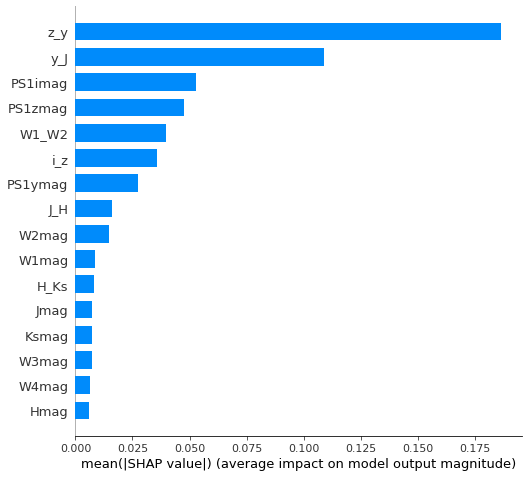

In [ ]:
shap.summary_plot(shap_values, df_x, plot_type="bar")

In [ ]:
dfy= pandas.DataFrame(data=y_val.values, columns=['y_true'])
dfy['y_pred_rf'] = y_pred_rf
dfy['y_pred_svm'] = y_pred_bsvc
dfy['y_pred_tab'] = y_pred_tbn

dfy.loc[dfy['y_true']!=dfy['y_pred_rf']]

,y_true,y_pred_rf,y_pred_svm,y_pred_tab
99,False,True,True,True
157,False,True,True,True
232,False,True,True,True
297,False,True,True,True
324,True,False,False,False
330,False,True,True,True
335,True,False,False,False
434,False,True,True,True
599,False,True,False,False
618,False,True,True,True


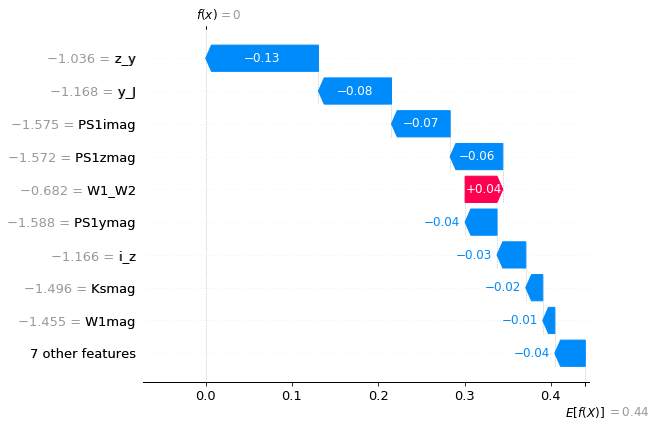

In [ ]:
shap.plots.waterfall(shap_values[293,:])

In [656]:
def bootstrap_metric(x, 
                     y,
                     samples_cnt = 100,
                     alpha = 0.05,
                     random_state = 42):
    size = len(x)
    np.random.seed(random_state)
    b_metric = np.zeros(samples_cnt)
    for it in range(samples_cnt):
        poses = np.random.choice(x.shape[0], size=x.shape[0], replace=True)
        
        x_boot = x[poses]
        y_boot = y[poses]
        
        #print(x_boot, y_boot)

        m_val = matthews_corrcoef(x_boot, y_boot)
        b_metric[it] = m_val
    
    return b_metric

In [657]:
boot_score_rf = bootstrap_metric(np.array(y_test), y_pred_rf)
boot_score_xgb = bootstrap_metric(np.array(y_test), y_pred_xgb)
boot_score_svc = bootstrap_metric(np.array(y_test), y_pred_svc)
boot_score_tbn = bootstrap_metric(np.array(y_test), y_pred_tbn)

NameError: name 'y_pred_rf' is not defined

In [ ]:
y=pandas.concat([pandas.DataFrame(boot_score_rf, columns=['RF']), 
                             pandas.DataFrame(boot_score_xgb, columns=['XGBoost']), 
                             pandas.DataFrame(boot_score_svc, columns=['SVC']),
                             pandas.DataFrame(boot_score_tbn, columns=['TabNet'])
                             ], axis=1)

In [ ]:
plt.figure(figsize=(15,10))
fp = sns.boxplot(data=y,fliersize=14)
plt.xlabel("Model", size=20)
plt.ylabel("Score", size=20)


xax = fp.xaxis 
xlabels1 = xax.get_ticklabels()
for label in xlabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(20)

yax = fp.yaxis 
ylabels1 = yax.get_ticklabels()
for label in ylabels1:
    # размер шрифта подписей делений оси OX 
    label.set_fontsize(20)


plt.title('All features', size=22)    